In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def remove_acks(panda):
    panda = panda[panda['TCPport_dst'] == 445]
    return panda 

In [3]:
def remove_treeID(panda, treeID):
    panda = panda[panda['TreeID'] != treeID]
    return panda

In [4]:
def remove_SessionID(panda, SessionID):
    panda = panda[panda['SessionID'] != SessionID]
    return panda

In [5]:
def read_from_txt(file_name):
    df = pd.read_csv(file_name, encoding = "ISO-8859-1", sep=" ",index_col=False)
    return df

In [6]:
def create_csv(panda, file_name):
    panda.to_csv(file_name, index=False)

In [7]:
def plot_freq_over_time(panda, SMBcommand, num_bins):
    plt.hist(x=panda.loc[panda['SMBcommand'] == SMBcommand].Timestamp , bins=num_bins)
    plt.show()

In [8]:
def pie_chart(panda):
    labels = '4', '5', '6', '7', '8','9', '10', '11', '12','13','14', '15', '16', '17'
    sizes = [len(panda.loc[panda['SMBcommand'] == 4]),
             len(panda.loc[panda['SMBcommand'] == 5]),
             len(panda.loc[panda['SMBcommand'] == 6]),
             len(panda.loc[panda['SMBcommand'] == 7]),
             len(panda.loc[panda['SMBcommand'] == 8]),
             len(panda.loc[panda['SMBcommand'] == 9]),
             len(panda.loc[panda['SMBcommand'] == 10]),
             len(panda.loc[panda['SMBcommand'] == 11]),
             len(panda.loc[panda['SMBcommand'] == 12]),
             len(panda.loc[panda['SMBcommand'] == 13]),
             len(panda.loc[panda['SMBcommand'] == 14]),
             len(panda.loc[panda['SMBcommand'] == 15]),
             len(panda.loc[panda['SMBcommand'] == 16]),
             len(panda.loc[panda['SMBcommand'] == 17])] 

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

In [9]:
def stat_summary_of_command(panda, SMBcommand, final):
    interval_range = pd.interval_range(start=0, freq=5, end=final, closed='left')
    bucket= panda.loc[panda['SMBcommand'] == SMBcommand]
    bucket = pd.cut(bucket['Timestamp'], bins=interval_range)
    print(bucket.value_counts().describe())
    fig1, ax1 = plt.subplots()
    ax1.set_title("Frequncy of call "+ str(SMBcommand))
    ax1.boxplot(bucket.value_counts())


In [10]:
def percentage_of_call(panda, SMBcommand):
    total = len(panda)
    SMB_total= len(panda.loc[panda['SMBcommand'] == SMBcommand])
    print("\nThis comamnd "+ str(SMBcommand))
    print("all calls "+ str(total))
    print("this call " +str(SMB_total))
    print("percentage "+str(SMB_total/total))

In [11]:
def show_all_percentage(panda):
    for x in range(0, 19):
        percentage_of_call(panda, x)

In [12]:
sopa = read_from_txt("full_io_files/Spora_17052017.txt")
#sopa = pd.read_csv("saved_csv/Spora_17052017.csv")
#sopa = remove_acks(sopa)
#sopa = remove_treeID(sopa, 0)
#sopa = remove_SessionID(sopa, 0)
create_csv(sopa, "saved_csv/Spora_17052017.csv")

In [13]:
wanna = read_from_txt("full_io_files/wannaCry_16052017.txt")
wanna = remove_acks(wanna)
wanna = remove_treeID(wanna, 0)
wanna = remove_SessionID(wanna, 0)
create_csv(wanna, "saved_csv/wannaCry_16052017.csv")

In [14]:
revange =read_from_txt("full_io_files/revenge_15032018.txt")
revange = remove_acks(revange)
revange = remove_treeID(revange, 0)
revange = remove_SessionID(revange, 0)
revange = remove_SessionID(revange, 4398046511193)
create_csv(revange, "saved_csv/revenge_15032018.csv")

In [15]:
crptFile =read_from_txt("full_io_files/CryptFile2_10112016.txt")
crptFile = remove_acks(crptFile)
crptFile = remove_treeID(crptFile, 0)
crptFile = remove_SessionID(crptFile, 0)
create_csv(crptFile, "saved_csv/CryptFile2_10112016.csv")

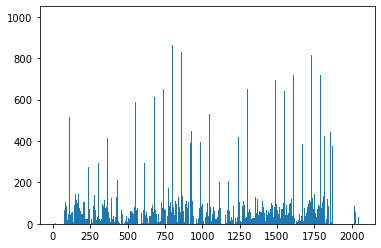

In [16]:
plot_freq_over_time(wanna, 6, 400)

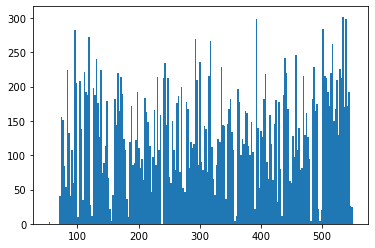

In [17]:
plot_freq_over_time(sopa, 9, 200)

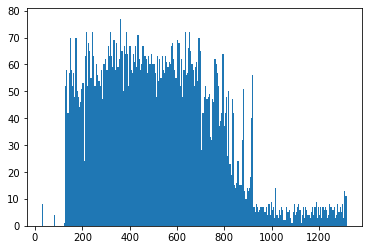

In [18]:
plot_freq_over_time(revange, 5, 265)

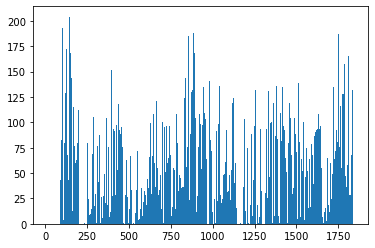

In [19]:
plot_freq_over_time(crptFile, 5, 370)

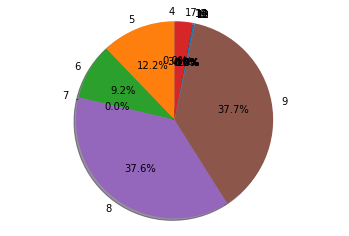

In [20]:
pie_chart(crptFile)

count    400.000000
mean      12.580000
std       12.152275
min        0.000000
25%        0.000000
50%       10.500000
75%       20.250000
max       66.000000
Name: Timestamp, dtype: float64


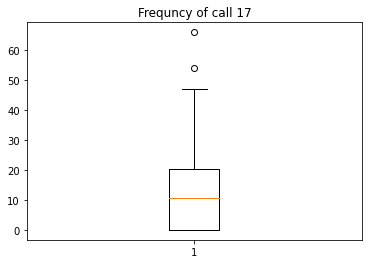

In [30]:
stat_summary_of_command(crptFile, 17, 2000)

In [22]:
show_all_percentage(crptFile)


This comamnd 0
all calls 168953
this call 0
percentage 0.0

This comamnd 1
all calls 168953
this call 0
percentage 0.0

This comamnd 2
all calls 168953
this call 0
percentage 0.0

This comamnd 3
all calls 168953
this call 0
percentage 0.0

This comamnd 4
all calls 168953
this call 1
percentage 5.918805821737406e-06

This comamnd 5
all calls 168953
this call 20560
percentage 0.12169064769492108

This comamnd 6
all calls 168953
this call 15521
percentage 0.09186578515918628

This comamnd 7
all calls 168953
this call 0
percentage 0.0

This comamnd 8
all calls 168953
this call 63527
percentage 0.3760039774375122

This comamnd 9
all calls 168953
this call 63746
percentage 0.3773001959124727

This comamnd 10
all calls 168953
this call 0
percentage 0.0

This comamnd 11
all calls 168953
this call 5
percentage 2.959402910868703e-05

This comamnd 12
all calls 168953
this call 0
percentage 0.0

This comamnd 13
all calls 168953
this call 0
percentage 0.0

This comamnd 14
all calls 168953
this cal

In [23]:
show_all_percentage(sopa)


This comamnd 0
all calls 182600
this call 15
percentage 8.214676889375685e-05

This comamnd 1
all calls 182600
this call 24
percentage 0.00013143483023001095

This comamnd 2
all calls 182600
this call 10
percentage 5.47645125958379e-05

This comamnd 3
all calls 182600
this call 22
percentage 0.00012048192771084337

This comamnd 4
all calls 182600
this call 20
percentage 0.0001095290251916758

This comamnd 5
all calls 182600
this call 61658
percentage 0.3376670317634173

This comamnd 6
all calls 182600
this call 41596
percentage 0.2277984665936473

This comamnd 7
all calls 182600
this call 0
percentage 0.0

This comamnd 8
all calls 182600
this call 37564
percentage 0.20571741511500546

This comamnd 9
all calls 182600
this call 26014
percentage 0.1424644030668127

This comamnd 10
all calls 182600
this call 0
percentage 0.0

This comamnd 11
all calls 182600
this call 18
percentage 9.857612267250822e-05

This comamnd 12
all calls 182600
this call 0
percentage 0.0

This comamnd 13
all call